# Polygons and Area Calculations

Suppose you have satellite imagery data, and you want to calculate the area of a deforested region, as well as count the number of pixels representing valid land cover and those that might be obscured by clouds or shadows. This type of analysis is critical for monitoring environmental changes over time.

## Objective:

The objective of this tutorial is to teach how to calculate the area under a specified geometry (polygon) and count the number of valid and invalid pixels within this area. This is a common task in geospatial analysis, particularly in remote sensing, where you might want to assess land cover, vegetation, or other features within a specific geographic region.


In this notebook, you will explore different techniques to achieve the objectives:


A. Using **Shapely** for Geometric Calculations: Shapely is a Python library for geometric operations. It allows you to directly calculate the area of a geometry in the coordinate system it is defined in. This method is useful when working with vector data and requires accurate area calculations.

B. Using **GeoPandas** for Spatial Analysis: GeoPandas extends the capabilities of Pandas to allow spatial operations on geometric data. It simplifies the process of working with shapefiles and other geospatial data formats, and it can be used to calculate areas and manage projections.


C. **Pixel Counting** and Multiplying by Resolution: This method involves counting the number of pixels within the geometry and multiplying by the resolution of the data (e.g., 20m x 20m for Sentinel-2 imagery) to get the area. This is straightforward and particularly useful when working with raster data.


## Tools You'll Use:

- OpenEO: To interact with satellite data and perform pixel counting.
- Shapely: For geometric operations and area calculations.
- GeoPandas: For managing geospatial data and performing calculations.
- Pandas: For data manipulation and analysis, especially when dealing with tabular data like pixel values.

## Learning Outcomes:

By the end of this tutorial, you will be able to:

- Visualize and understand geometric data.
- Calculate the area of a polygon using both pixel-based and geometry-based methods.
- Count and analyze valid and invalid pixels within a specific geometry.
- Apply these techniques to different geospatial datasets.

Let's start by visualizing the example geometry and understanding its structure before moving on to calculating its area using different methods


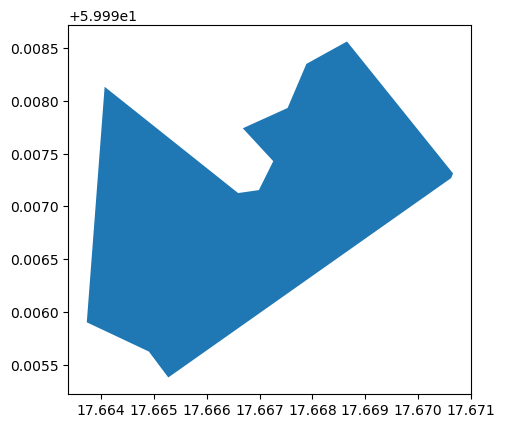

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape

# Example geometry
geom = {'type': 'Polygon', 'coordinates': [[[17.665270930775755, 59.995379244747966],
                                            [17.67062992671201, 59.99726841066224],
                                            [17.6706665367172, 59.99731246487363],
                                            [17.66865618054931, 59.998562597273036],
                                            [17.667887659980714, 59.998350223136455],
                                            [17.667531275365462, 59.99793238650041],
                                            [17.66668280978647, 59.99774021838905],
                                            [17.667259639988757, 59.99742845749122],
                                            [17.666987595091204, 59.99715474568522],
                                            [17.666593975117546, 59.99712641147649],
                                            [17.664064888468328, 59.998133391566974],
                                            [17.6637266530725, 59.99590200378276],
                                            [17.66490257827024, 59.995624959444285],
                                            [17.665270930775755, 59.995379244747966]]]}

# Convert to a GeoDataFrame
gdf = gpd.GeoDataFrame({'geometry': [shape(geom)]}, crs="EPSG:4326")

# Plot
gdf.plot()
plt.show()

# A. Calculating the Area using Shapely
In this section, you'll explore how to calculate the area using Shapely, which works directly with the geometry and doesn't rely on pixel data,
offering a different perspective. Shapely is a powerful alternative for calculating areas when working with vector data. It provides precise and projection-aware results that are crucial for many geospatial applications.
The `area_meters` value in the example below represents the accurate area of the polygon in square meters.
This method may be more precise than pixel counting, especially for complex geometries, and it doesn’t depend on the resolution of raster data.
### Approach:
To accurately calculate the area in square meters, the geometry must be reprojected into a coordinate reference system (CRS) that uses meters as its unit of measurement, such as UTM (Universal Transverse Mercator).
Reprojection: This involves transforming the geometry from the geographic CRS (EPSG:4326) to a projected CRS like UTM.

### Advantages of Using Shapely:
- Accuracy: Shapely provides more accurate area calculations by working directly with vector data and using appropriate projections.
- Flexibility: This method can be applied to any geometry, regardless of the complexity of its shape, and it’s independent of the raster resolution.
- Ease of Use: Shapely's integration with other libraries like GeoPandas and its ability to work with various coordinate systems make it a versatile tool in geospatial analysis.

### Limitations:
- Projection Knowledge: To use Shapely effectively, you need to be aware of the appropriate projections for your geographic area of interest.
- No Raster Data Integration: Unlike the pixel counting method, Shapely doesn’t take into account pixel-based data like satellite imagery, so it’s more suited for purely vector-based analyses.

### The complete example
In the notebook cell below you find the complete example, followed by detailed explanations of each step:  

In [2]:
from shapely.geometry import shape
from pyproj import Transformer
from shapely.ops import transform

# Example geometry as a Shapely object
polygon = shape(geom)

# 1. Define a transformer to convert from EPSG:4326 to EPSG:3006 (UTM zone 33N)
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3006", always_xy=True)

# 2. Reproject the geometry to UTM for accurate area calculation
polygon_projected = transform(transformer.transform, polygon)

# 3. Calculate the area in square meters
area_meters = polygon_projected.area
print(f"Area in square meters: {area_meters}")


Area in square meters: 69216.74282692533


## Detailed explanation of the example above
### 1. Define a transformer
The geometry is built up by coordinates and WGS84 for example is specified in degrees, which would yield an area in degrees bacck. 
This is usually not what we want so we need to create a tool that can translate the points of the geometry to metres (such as used in SWEREF99). 
The code ```Transformer.from_crs("EPSG:4326", "EPSG:32633", always_xy=True)``` creates such a transformer. It can now be used to translaty any number of geometries.
### 2. Reproject
Converting the points in our geometry is done using our `transformer` from e.g. EPSG:4328 (WGS84) to EPSG:3006 (SWEREF00). The transformer will create and return
a new geometry with the points expressed in meters instead of degrees. 
### 3. Calculate area
Now calculating the area is done using the built in property  `area` on the resulting geometry. 


# B. Calculating the Area using GeoPandas
GeoPandas and Shapely are essential tools for geospatial analysis in Python, each offering unique strengths. Shapely is ideal for precise, high-performance geometric operations on individual or small sets of geometries, making it perfect for tasks requiring detailed shape manipulation. In contrast, GeoPandas extends these capabilities, integrating geometric operations with powerful data management, analysis, and visualization, particularly when working with large datasets containing multiple geometries and associated attributes. In this lab, we will leverage GeoPandas' ability to handle and analyze complex geospatial datasets seamlessly, combining spatial operations with data analysis and visualization for a comprehensive geospatial workflow.

### Approach
The approach identical similar to the one of Shapely. The main difference is syntactical and that you can transform whole arrays of geometries with geopandas.

### Advantages of Using GeoPandas:
- Ease of Use: GeoPandas simplifies many spatial operations, making it easy to reproject geometries, calculate areas, and manage complex geospatial datasets.
- Integration: GeoPandas integrates seamlessly with Pandas, allowing you to perform powerful data manipulations and analyses on geospatial data.
- Visualization: The built-in plotting capabilities make it easy to visualize your geometries and the results of your analyses.

### Limitations:

- Performance: For very large datasets, GeoPandas may not be as performant as some other spatial libraries, such as PostGIS or specialized GIS software.
- Memory Usage: GeoPandas operations can be memory-intensive, especially when working with large or complex geometries.

### The complete example

In the notebook cell below you find the complete example, followed by detailed explanations of each step: 

In [3]:
# 1. Convert to a GeoDataFrame
gdf = gpd.GeoDataFrame({'geometry': [shape(geom)]}, crs="EPSG:4326")

# 2. Reproject to UTM for accurate area calculation
gdf_projected = gdf.to_crs(epsg=3006)  # Example UTM zone

# 3. Calculate the area
gdf_projected['area'] = gdf_projected.area
print(gdf_projected['area'])


0    69216.742827
Name: area, dtype: float64


## Detailed explanation of the example above
## 1. Convert to GeoDataFrame
You know that our example geometry `geom` is WGS84 (EPSG:4326) but since it is expressed as geojson that information needs to be get into the `GeoDataFrame` when we convert the geometry to such frame. 
## 2. Reproject
When using GeoDataFrames there is a built in method `to_crs` that we can use to transform our geometry to any CRS.
As for Shapely, we need to have the pixels in meters so we transform to SWEREF (EPSG:3006). Note the different input format for the CRS. You need to check each API how they prefer this infomation. 
## 3. Calculate
As for shapely, we can use the built in property `area` to calculate the area for *all* geometries in the frame. 


# C. Calculating the Area using Pixel Counting
### Understanding the Concepts:
- **Resolution and Pixel Counting**: Satellite imagery and other raster data are composed of pixels, each covering a specific area on the Earth's surface. The size of each pixel is determined by the resolution of the data. For example, Sentinel-2 imagery has a resolution of 10 meters, meaning each pixel represents a 10m x 10m area, or 100 square meters. Other bands such as the Scene Classification Layer (SCL) have 20m resolution. 
- **Valid vs. Invalid Pixels**: In geospatial analysis, "valid" pixels typically represent meaningful data, such as land cover, while "invalid" pixels might be those obscured by clouds, water, or other factors. Understanding the distinction is crucial when calculating the area because you usually want to exclude invalid pixels.

### Advantages of This Method:
- Pixel Precision: This method is highly precise for raster data because it calculates the area directly from the number of pixels, which is particularly useful when working with high-resolution satellite imagery.

- Handling Large Datasets: OpenEO and similar platforms are designed to handle large remote sensing datasets efficiently, making it easier to process and analyze data without needing to download large files locally.

### Limitations:
- Projection Issues: This method assumes the projection of the raster data matches the real-world distances (e.g., UTM or other suitable projections). If the data is in a geographic projection (lat/lon), the pixel area might vary across the image.

- Resolution Dependency: The accuracy of the area calculation depends on the resolution of the data. For finer resolutions, this method is more accurate, but for coarser resolutions, the area might be less precise.
    
### The complete example
In the notebook cell below you find the complete example, followed by detailed explanations of each step: 

In [4]:
import openeo 
from config import user,passwd,eo_service_url

# Connect to OpenEO
conn = openeo.connect(eo_service_url)

conn.authenticate_basic(username=user, password=passwd)

# 1. Load the data
datacube = conn.load_collection(
    collection_id = "s2_msi_l2a",
    bands=["scl"], # We may add more bands here give that they have the same resolution
    spatial_extent=geom,
    temporal_extent=["2023-06-12", "2023-06-13"]
)
# 2. Mask out valid pixels
masked_datacube = datacube.mask(datacube.band("scl") != 4) # 4 represents 'vegetation'
masked_datacube =  masked_datacube == 4 
# 3. Calculate area using pixel count
pixel_area = 20 * 20  # For 10m x 10m resolution
# FIXME: disabled until OpenEO server bug has been fixed.
#valid_pixel_count = masked_datacube.aggregate_spatial(geom, "sum").execute()
#total_area = valid_pixel_count['data'][0][0][0] * pixel_area
#total_area

64000.0

# Detailed explanation of the example above
## 1. Loading the data:
The `load_collection` call prepares a `datacube` containing the the images available for the given dates. The back-end will try to find all relevant images and stitch them together to cover the given geometry and time span. It may be worth noting that datacubes are always rectangular, even if we send in a ragged polygon as in our example. However, since we send in a geometry, all pixels outside the given geometry in the rectangle will be set to No-Data. This is done for all bands and all timesteps found for the requested product.  

## 2. Masking Invalid Pixels:
The pixels outside the geometry are obviously invalid, but so may also pixels covered by clouds etc be. We can use the Scene Classification Layer (SCL) band to filter out such invalid pixels. For example, vegetation might be represented by a value of 4 in the SCL band. A mask *removes* any pixels that are set to 1 (true) in the mask. Therefore we create a mask for pixels that have any other value than the one we are interested in. 
```python
    masked_datacube = datacube.mask(datacube.band("scl") != 4) # 4 represents 'vegetation'
```
    
There are a few things going on here. Let´s break it down a bit. The code ```datacube.band("scl") != 4``` creates a rectangular boolean mask of the same dimensions of the datacube. The negation means that the expression is true for anything that is other than 4. Notably the data outside the geometry is already set to no-data (already masked out). Then ```datacube.mask(...)``` part goes through all bands and timesteps setting any pixel that is true in the mask to no data. This leaves us with a cube that has either no-data or 4. Summing those would give an area four times too big so the part ```masked_datacube =  masked_datacube == 4```sets each pixel to true (1.0). 

## 3. Counting the valid pixels
```python
masked_datacube.aggregate_spatial(geom, "sum")
```
applies a pre-defined process that sums the pixels for each band and each time-step.
Finally, the ```execute()``` sends of the calculation to the back-end, returning a JSON structure where we can extract the sum. 
## 4. Calcuating the actual covered area
Now we know how many pixels in our geometry that are valid. Knowing the pixel area (20m for scl and 10m for most other bands) we can now get the final are by 
```python
valid_pixel_count['data'][0][0][0] * pixel_area